# Лабораторная работа 2

**Внимание!** За эту работу можно получить не более 10 баллов. Так что вы можете выбрать, какие из заданий вам более интересны, и делать их. Оценка будет равна минимуму из 10 и полученного вами числа баллов.

## Линейная регрессия

### Метод наименьших квадратов: постановка задачи

Рассмотрим систему уравнений $Xa = y$, в которой $a$ --- столбец неизвестных. Её можно переписать в векторном виде
$$x_1 a_1 + x_2 a_2 + \ldots + x_k a_k = y,$$
где $x_1,\ldots,x_n$ --- столбцы матрицы $X$. Таким образом, решить исходную систему означает найти линейную комбинацию векторов $x_1,\ldots,x_n$, равную правой части. Но что делать, если такой линейной комбинации не существует? Геометрически это означает, что вектор $y$ не лежит в подпространстве $U = \langle x_1,\ldots, x_k\rangle$. В этом случае мы можем найти *псевдорешение*: вектор коэффициентов $\hat{a}$, для которого линейная комбинация $x_1 \hat{a}_1 + x_2 \hat{a}_2 + \ldots + x_k \hat{a}_k$ хоть и не равна в точности $y$, но является наилучшим приближением --- то есть ближайшей к $y$ точкой $\hat{y}$ подпространства $U$ (иными словами, ортогональной проекцией $y$ на это подпростанство). Итак, цель наших исканий можно сформулировать двумя эквивалентными способами:

1. Найти вектор $\hat{a}$, для которого длина разности $|X\hat{a} - y|$ минимальна (отсюда название "метод наименьших квадратов");
2. Найти ортогональную проекцию $\hat{y}$ вектора $y$ на подпространство $U$ и представить её в виде $X\hat{a}$.

Далее мы будем предполагать, что векторы $x_1,\ldots,x_n$ линейно независимы (если нет, то сначала имеет смысл выделить максимальную линейно независимую подсистему).

На лекциях было показано, что проекция вектора $y$ на подпространство $U = \langle x_1,\ldots, x_k\rangle$, записывается в виде
$$\hat{y} = X\left(X^TX\right)^{-1}X^Ty,$$
и, соответственно, искомый вектор $\hat{a}$ равен
$$\hat{a} = \left(X^TX\right)^{-1}X^Ty.$$

### Задача линейной регрессии

Начнём с примера. Допустим, вы хотите найти зависимость среднего балла S студента ФКН от его роста H, веса W, длины волос L и N - количества часов, которые он ежедневно посвящает учёбе. Представьте, что мы измерили все эти параметры для $n$ студентов и получили наборы значений: $S_1,\ldots, S_n$, $H_1,\ldots, H_n$ и так далее.

Тут можно подбирать много разных умных моделей, но начать имеет смысл с самой простой, линейной:
$$S = a_1H + a_2W + a_3L + a_4N + a_5.$$
Конечно, строгой линейной зависимости нет (иначе можно было бы радостно упразднить экзамены), но мы можем попробовать подобрать коэффициенты $a_1, a_2, a_3, a_4, a_5$, для которых отклонение правой части от наблюдаемых было бы наименьшим:
$$\sum_{i=1}^n\left(S_i - ( a_1H_i + a_2W_i + a_3L_i + a_4N_i + a_5)\right)^2 \longrightarrow \min$$
И сразу видно, что мы получили задачу на метод наименьших квадратов! А именно, у нас
$$X =
\begin{pmatrix}
H_1 & W_1 & L_1 & N_1 & 1\\
H_2 & W_2 & L_2 & N_2 & 1\\
\dots & \dots & \dots & \dots & \dots \\
H_n & W_n & L_n & N_n & 1
\end{pmatrix},\qquad y=
\begin{pmatrix}
S_1\\ S_2\\ \vdots \\ S_n
\end{pmatrix}$$

Решая эту задачу с помощью уже известных формул, получаем оценки коэффициентов $\hat{a}_i$ ($i = 1\ldots,5$).

Теперь проговорим общую постановку задачи линейной регрессии. У нас есть $k$ переменных $x_1,\ldots,x_k$ ("регрессоров"), через которые мы хотим выразить "объясняемую переменную" $y$:
$$y = a_1x_1 + a_2x_2 + \ldots + a_kx_k$$
Значения всех переменных мы измерили $n$ раз (у $n$ различных объектов,  в $n$ различных моментов времени - это зависит от задачи). Подставим эти данные в предыдущее равенство:
$$\begin{pmatrix}
y_1\\ y_2 \\ \vdots \\ y_n
\end{pmatrix} = 
a_1\begin{pmatrix}
x_{11} \\ x_{21} \\ \vdots \\ x_{n1} \end{pmatrix} + a_2\begin{pmatrix}
x_{12} \\ x_{22} \\ \vdots \\ x_{n2} \end{pmatrix} + \ldots + a_k\begin{pmatrix}
x_{1k} \\ x_{2k} \\ \vdots \\ x_{nk} \end{pmatrix}$$
(здесь $x_{ij}$ - это значение $j$-го признака на $i$-м измерении). Это удобно переписать в матричном виде:
$$\begin{pmatrix}
x_{11} & x_{12} & \ldots & x_{1k}\\
x_{21} & x_{22} & \ldots & x_{2k}\\
\dots & \dots & \dots & \dots\\
x_{n1} & x_{n2} & \ldots & x_{nk}
\end{pmatrix} \cdot
\begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_k
\end{pmatrix} = 
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}$$
или коротко $Xa = y$. Поскольку на практике эта система уравнений зачастую не имеет решения (ибо зависимости в жизни редко бывают действительно линейными), методом наименьших квадратов ищется псевдорешение.

### Оценка качества. Обобщающая способность. Обучение и тест 

После того, как вы построили регрессию и получили какую-то зависимость объясняемой переменной от регрессоров, настаёт время оценить качество регрессии. Есть много разных функционалов качества; мы пока будем говорить только о самом простом и очевидном из них: о среднеквадратичной ошибке (mean square error). Она равна
$$\frac1{n}|X\hat{a} - y|^2 = \frac1{n}\sum_{i=1}^n\left(\hat{a}_1x_{i1} + \hat{a}_2x_{i2} + \ldots + \hat{a}_kx_{ik} - y_i\right)^2$$

В целом, хочется искать модели с наименьшей mean square error на имеющихся данных. Однако слишком фанатичная гонка за минимизацией ошибки может привести к печальным последствиям. Например, если мы приближаем функцию одной переменной по значениям в $n$ точках, то наилучшей с точки зрения этой ошибки моделью будет многочлен $(n-1)$-й степени, для которого эта ошибка будет равна нулю.  Тем не менее, вряд ли истинная зависимость имеет вид многочлена большой степени. Более того, значения вам скорее всего даны с погрешностью, то есть вы подогнали вашу модель под свои зашумлённые данные, но на любых других данных (то есть в других точках) точность, скорее всего, окажется совсем не такой хорошей. Этот эффект называют **переобучением**; говорят также, что **обобщающая способность** модели оказалась скверной.

Чтобы не попадать в эту ловушку, данные обычно делят на обучающие (по которым строят модель и оценивают коэффициенты) и тестовые. Лучшей стоит счесть ту модель, для которой значение функционала качества будет меньше.

### Задание 1. Метод наименьших квадратов (4 балла)

Скачайте файлы ``train.txt`` и ``test.txt``. В первом из них находится обучающая выборка, а во втором - тестовая. Каждый из файлов содержит два столбца чисел, разделённых пробелами: в первом - $n$ точек (значения аргумента $x$), во втором - значения некоторой функции $y = f(x)$ в этих точках, искажённые случайным шумом. Ваша задача - по обучающей выборке подобрать функцию $y = g(x)$, пристойно приближающую неизвестную вам зависимость.

Загрузим обучающие и тестовые данные (не забудьте ввести правильный путь!).

In [194]:
import numpy as np

data_train = np.loadtxt('train.txt', delimiter=',')
data_test = np.loadtxt('test.txt', delimiter=',')

Разделим значения $x$ и $y$

In [195]:
X_train = data_train[:,0]
y_train = data_train[:,1]

X_test = data_test[:,0]
Y_test = data_test[:,1]

Найдите с помощью метода наименьших квадратов линейную функцию ($y = kx + b$), наилучшим образом приближающую неизвестную зависимость. Полезные функции: ``numpy.ones(n)`` для создания массива из единиц длины $n$ и ``numpy.concatenate((А, В), axis=1)`` для слияния двух матриц по столбцам (пара ``А`` и ``В`` превращается в матрицу ``[A B]``).

In [196]:
def find_polynom(X):
    vector_of_ones = np.array([np.ones(len(X_train))]).transpose()
    new_X = X
    new_X = np.concatenate((new_X, vector_of_ones), axis = 1)
    ans = new_X.T.dot(new_X)
    ans = np.linalg.inv(ans)
    ans = ans.dot(new_X.T)
    ans = ans.dot(vector_of_y)
    return ans
    
vector_of_x = np.array([X_train]).transpose()
vector_of_y = np.array([y_train]).transpose()
X = np.array([X_train]).transpose()

#Коэффициенты k и b соотвественно
ans = find_polynom(X)
print('Coefficient k :', ans.tolist()[0][0])
print('Coefficient b :', ans.tolist()[1][0])

Coefficient k : 2.279134498051947
Coefficient b : 4.433230905064933


Нарисуйте на плоскости точки $(x_i, y_i)$ и полученную линейную функцию. Глядя на данные, подумайте, многочленом какой степени можно было бы лучше всего приблизить эту функцию. Найдите этот многочлен и нарисуйте его график.

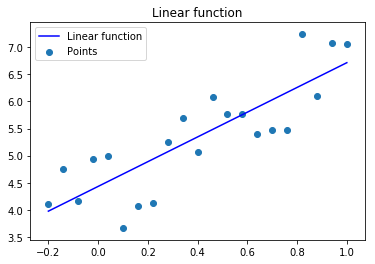

In [197]:
import matplotlib.pyplot as plt

def polynom_in_point(x, ans):
    n = len(ans)
    result = 0
    for j in range(n):
        result += (x ** (n - j - 1)) * ans[j]
    return result

def training_error(coeffs):
    training_error = 0
    for k in range(len(X_train)):
        result = polynom_in_point(X_train[k], coeffs)
        training_error += ((result - y_train[k]) ** 2)
    return training_error / len(X_train)

def test_error(coeffs):
    test_error = 0
    for k in range(len(X_test)):
        result = polynom_in_point(X_test[k], coeffs)
        test_error += ((result - Y_test[k]) ** 2)
    return test_error / len(X_test)

#Здесь хранятся значения полученной функции i-ой степени, вычисленные в точках
y = [[] for i in range(11)]

#Коэффициенты найденных полиномов
coeffs = [[] for i in range(6)]

list_train_error = []
list_test_error = []

#Цикл до 20 включительно, так как нужны X_train[i] в 20-й степени для нахождения полинома, который лучше всего приближает
for i in range(1, 21):
    vector_of_x = [x ** i for x in X_train]
    vector_of_x = np.array([vector_of_x]).transpose()
    if i != 1:
        X = np.column_stack((vector_of_x, X))
    else:
        X = vector_of_x
    coef = find_polynom(X)
    if i <= 6:
        coeffs[i - 1] = coef
    y_func = [polynom_in_point(x, coef) for x in X_train]
    if i <= 10:
        y[i - 1] = y_func
        list_train_error.append(training_error(coef))
        list_test_error.append(test_error(coef))

#График линейной функции
plt.plot(X_train, y[0], color = 'blue', label = 'Linear function')
plt.scatter(X_train, y_train, label = 'Points')
plt.title('Linear function')
plt.legend()

Известно, что для ${n}$ точек можно построить полином ${n - 1}$ степени, который будет проходить через все ${n}$ точек.    
Тогда лучше всего обучающую подборку будет приближать полином `len(X_train) - 1` степени.       
Найдем его следующим образом:         
Создадим матрицу X, строкой которой является `X_train[i]` в степенях от первой до двацатой, а в последнем столбце единица.   
Строк столько же, сколько `len(X_train)`.          
Затем с помощью `linalg.solve()` найдем необходимые коэффициенты, так как получается совместная СЛУ.

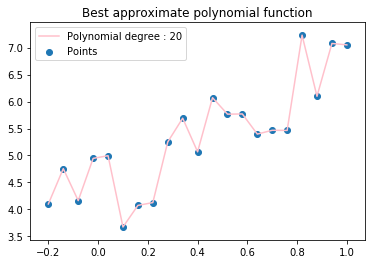

In [198]:
X = np.column_stack((X, np.array([np.ones(len(X_train))]).transpose()))
coeffs_approx = np.linalg.solve(X, vector_of_y)

#График полинома, лучше всего приближающего тестовую выборку
plt.plot(X_train, [polynom_in_point(X_train[k], coeffs_approx) for k in range(len(X_train))], color = 'pink', label = 'Polynomial degree : 20')
plt.scatter(X_train, y_train, label = 'Points')
plt.title('Best approximate polynomial function')
plt.legend()

Для $k = 1,2,3,\ldots,10$ найдите многочлен $\hat{f}_k$ степени $k$, наилучшим образом приближающий неизвестную зависимость. Для каждого из них найдите среднеквадратическую ошибку на обучающих данных и на тестовых данных: $\frac1{n}\sum_{i=1}^n\left( \hat{f}_k(x_i) - y_i \right)^2$ (в первом случае сумма ведётся по парам $(x_i, y_i)$ из обучающих данных, а во втором - по парам из тестовых данных).

Для $k = 1,2,3,4,6$ напечатайте коэффициенты полученных многочленов и нарисуйте их графики на одном чертеже вместе с точками $(x_i, y_i)$ (возможно, график стоит сделать побольше; это делается командой `plt.figure(figsize=(width, height))`).

In [199]:
#Выводим коэффициенты
degree = 1
for coeff_polynom in coeffs:
    print('Polynomial degree :', degree, '\n')
    for coeff in coeff_polynom:
        print(coeff[0])
    degree += 1
    print('\n')
    
    
#Таблица ошибок  
import pandas as pd
    
table = pd.DataFrame({
    'Error on training data' : [x[0] for x in list_train_error],
    'Error on testing data' : [x[0] for x in list_test_error]
}, index = ['Polynomial degree: ' + str(x) for x in range(1, 11)])

table

Polynomial degree : 1 

2.279134498051947
4.433230905064933


Polynomial degree : 2 

1.401628512115304
1.157831688359711
4.472476503404165


Polynomial degree : 3 

-0.38176860428759785
1.8597508372604779
1.0650161052854341
4.460736355285109


Polynomial degree : 4 

7.918474697309065
-13.051328119987474
6.794091784359015
1.171802392631598
4.3411661203997065


Polynomial degree : 5 

29.524978041541743
-51.13148138569872
21.37479627633907
3.274714401821951
-0.130598039877325
4.431297813823159


Polynomial degree : 6 

-229.97013342382837
581.4532982521733
-481.51013289138245
121.2570971308692
16.002903990696225
-4.597179325185289
4.3837950110231905




,Error on training data,Error on testing data
Polynomial degree: 1,0.296897,0.435120
Polynomial degree: 2,0.269699,0.356476
Polynomial degree: 3,0.269497,0.355346
Polynomial degree: 4,0.261067,0.441727
Polynomial degree: 5,0.249985,0.557973
Polynomial degree: 6,0.188293,2.581693
Polynomial degree: 7,0.185396,2.515783
Polynomial degree: 8,0.159056,4.357289
Polynomial degree: 9,0.158472,4.776321
Polynomial degree: 10,0.153166,14.632135


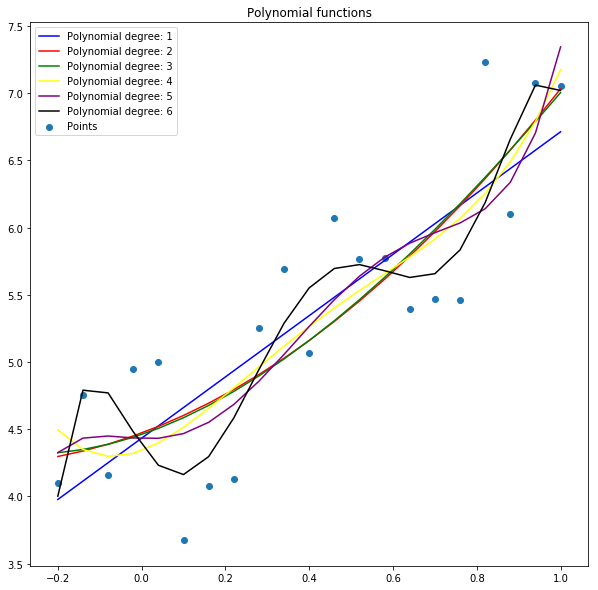

In [200]:
#Графики полиномов от первой до шестой степени

plt.figure(figsize=(10, 10))
plt.scatter(X_train, y_train, label = 'Points')
plt.plot(X_train, y[0], color = 'blue', label = 'Polynomial degree: 1')
plt.plot(X_train, y[1], color = 'red', label = 'Polynomial degree: 2')
plt.plot(X_train, y[2], color = 'green', label = 'Polynomial degree: 3')
plt.plot(X_train, y[3], color = 'yellow', label = 'Polynomial degree: 4')
plt.plot(X_train, y[4], color = 'purple', label = 'Polynomial degree: 5')
plt.plot(X_train, y[5], color = 'black', label = 'Polynomial degree: 6')
plt.title('Polynomial functions')
plt.legend()

Что происходит с ошибкой при росте степени многочлена? Казалось бы, чем больше степень, тем более сложным будет многочлен и тем лучше он будет приближать нашу функцию. Подтверждают ли это ваши наблюдения? Как вам кажется, чем объясняется поведение ошибки на тестовых данных при $k = 10$?

В какой-то момент с ростом степени многочлена начинает значительно расти ошибка на тестовых данных.          
Это следствие того, что многочлен большой степени чаще всего отражает зависимость лишь обучающих данных, очень слабо коррелируя с тестовой подборкой. 
Это подтверждается в особенности многочленом десятой степени.    
Другими словами, имеет место переобучение.

### Задание 2. Линейная регрессия (4 балла)

Скачайте файлы ``flats_moscow_mod.txt`` и ``flats_moscow_description.txt``. В первом из них содержатся данные о квартирах в Москве. Каждая строка содержит шесть характеристик некоторой квартиры, разделённые знаками табуляции; в первой строке записаны кодовые названия характеристик. Во втором файле приведены краткие описания признаков. Вашей задачей будет построить с помощью метода наименьших квадратов (линейную) зависимость между ценой квартиры и остальными доступными параметрами.

С помощью известных вам формул найдите регрессионные коэффициенты. Какой смысл имеют их знаки? Согласуются ли они с вашими представлениями о жизни?

Оцените качество приближения, вычислив среднеквадратическую ошибку.

In [201]:
def find_coeffs(X):
    new_X = X
    ans = new_X.T.dot(new_X)
    ans = np.linalg.inv(ans)
    ans = ans.dot(new_X.T)
    ans = ans.dot(price)
    return ans

def model_price(coeffs, index):
    return (coeffs[0] * total_space[index] + 
            coeffs[1] * live_space[index] + 
            coeffs[2] * kitchen_space[index] +
            coeffs[3] * distance_from_center[index] + 
            coeffs[4] * distance_to_underground[index] + 
            coeffs[5])

def test_error(coeffs):
    error = 0
    for i in range(len(total_space)):
        error += (price[i] - model_price(coeffs, i)) ** 2
    return error / len(total_space)
    

data_flats = np.loadtxt('flats_moscow_mod.txt', delimiter='\t', skiprows = 1)

price = np.array([data_flats[:,0]]).transpose()
total_space = np.array([data_flats[:,1]]).T
live_space = np.array([data_flats[:,2]]).T
kitchen_space = np.array([data_flats[:,3]]).T
distance_from_center = np.array([data_flats[:,4]]).T
distance_to_underground = np.array([data_flats[:,5]]).T
vector_of_ones = np.array([np.ones(len(total_space))]).T

X = np.column_stack((total_space, 
                     live_space, 
                     kitchen_space, 
                     distance_from_center, 
                     distance_to_underground, 
                     vector_of_ones))

coeffs = find_coeffs(X)
print('total space coefficient:', coeffs[0][0])
print('live space coefficient:', coeffs[1][0])
print('kitchen space coefficient:', coeffs[2][0])
print('distance from center coefficient:', coeffs[3][0])
print('distance to underground coefficient:', coeffs[4][0])
print('free term coefficient:', coeffs[5][0], '\n')
print('mean square error:', test_error(coeffs)[0])

total space coefficient: 1.4870528861257433
live space coefficient: 1.6562890012269538
kitchen space coefficient: 1.8192049792748684
distance from center coefficient: -3.3271540562741437
distance to underground coefficient: -1.3156886037016053
free term coefficient: -26.78926963418401 

mean square error: 924.0090032083999


В случае, если цена квартиры имеет обратную зависисмость от параметра, то коэффициент отрицательный, если же прямая зависимость, то коэффициент положительный.           
То есть вполне разумно то, что цена квартиры имеет обратную зависимость от расстояния до центра, так как чем дальше квартира от центра, тем она дешевле. Также и с общей площадью квартиры - очевидно, что чем она больше, тем квартира дороже.       
Получившиеся коэффициенты и их знаки согласуются с моими представлениями о рынке недвижимости.

### Усложнение модели

Конечно, никто не гарантирует, что объясняемая переменная (цена квартиры) зависит от остальных характеристик именно линейно. Зависимость может быть, например, квадратичной или логарифмической; больше того, могут быть важны не только отдельные признаки, но и их комбинации. Это можно учитывать, добавляя в качестве дополнительных признаков разные функции от уже имеющихся характеристик: их квадраты, логарифмы, попарные произведения.

В этом задании вам нужно постараться улучшить качество модели, добавляя дополнительные признаки, являющиеся функциями от уже имеющихся. Но будьте осторожны: чрезмерное усложнение модели будет приводить к переобучению. 

**Сравнение моделей**

Когда вы построите новую модель, вам захочется понять, лучше она или хуже, чем изначальная. Проверять это на той же выборке, на которой вы обучались, бессмысленно и даже вредно (вспомните пример с многочленами: как прекрасно падала ошибка на обучающей выборке с ростом степени!). Поэтому вам нужно будет разделить выборку на обучающую и тестовую. Делать это лучше случайным образом (ведь вы не знаете, как создатели датасета упорядочили объекты); рекомендуем вам для этого функцию `sklearn.model_selection.train_test_split`.

In [202]:
from sklearn.model_selection import train_test_split

import math

def find_coeffs(X):
    new_X = X
    ans = new_X.T.dot(new_X)
    ans = np.linalg.inv(ans)
    ans = ans.dot(new_X.T)
    ans = ans.dot(Y_train)
    return ans

def first_model_in_point(coeffs, index):
    new_x = X_test.T
    return (coeffs[0] * new_x[0][index] +
            coeffs[1] * new_x[1][index] +
            coeffs[2] * new_x[2][index] +
            coeffs[3] * new_x[3][index] +
            coeffs[4] * new_x[4][index] +
            coeffs[5]
           )

def get_first_model_error(coeffs):
    error = 0
    for j in range(len(X_test.T[0])):
        error += (first_model_in_point(coeffs, j) - Y_test[j]) ** 2
    return error

def new_model_in_point(coeffs, index):
    new_x = X_test.T
    return (coeffs[0] * new_x[0][index] +
            coeffs[1] * new_x[1][index] +
            coeffs[2] * new_x[2][index] +
            coeffs[3] * new_x[3][index] +
            coeffs[4] * new_x[4][index] +
            coeffs[5] * (new_x[0][index] ** 2) +
            coeffs[6] * (new_x[1][index] ** 2) +
            coeffs[7] * (new_x[2][index] ** 2) +
            coeffs[8] * (math.cos(new_x[3][index])) +
            coeffs[9] * (math.sin(new_x[4][index])) +
            coeffs[10] * (new_x[0][index] * new_x[1][index] * new_x[3][index] * new_x[4][index]) +
            coeffs[11] * (new_x[1][index] * new_x[3][index] * new_x[4][index]) +
            coeffs[12] * (new_x[0][index] ** 3) +
            coeffs[13] * (new_x[1][index] ** 3) + 
            coeffs[14] * (new_x[2][index] ** 3) +
            coeffs[15] * (math.log(new_x[3][index])) + 
            coeffs[16] * (math.log(new_x[4][index])) + 
            coeffs[17]
           )

def get_new_model_error(coeffs):
    error = 0
    for j in range(len(X_test.T[0])):
        error += (new_model_in_point(coeffs, j) - Y_test[j]) ** 2
    return error
    
    
first_model_error = 0
new_model_error = 0

for i in range(1000):
    union_X = np.column_stack((total_space, 
                     live_space, 
                     kitchen_space, 
                     distance_from_center, 
                     distance_to_underground))
    
    X_train, X_test, Y_train, Y_test = train_test_split(union_X, price)
    vector_of_ones = np.array([np.ones(len(X_train.T[0]))]).T
    X = np.column_stack((X_train, vector_of_ones))
    first_coeffs = find_coeffs(X)
    first_model_error += get_first_model_error(first_coeffs) / len(Y_test)
    
    #making new model on training data
    go_x = X_train.T
    to_add_1 = np.array([x ** 2 for x in go_x[0]]).T
    to_add_2 = np.array([x ** 2 for x in go_x[1]]).T
    to_add_3 = np.array([x ** 2 for x in go_x[2]]).T
    to_add_4 = np.array([math.cos(x) for x in go_x[3]]).T
    to_add_5 = np.array([math.sin(x) for x in go_x[4]]).T
    to_add_6 = np.array([go_x[0][j] * go_x[1][j] * go_x[3][j] * go_x[4][j] for j in range(len(go_x[0]))]).T
    to_add_7 = np.array([go_x[1][j] * go_x[3][j] * go_x[4][j] for j in range(len(go_x[1]))]).T
    to_add_8 = np.array([x ** 3 for x in go_x[0]]).T
    to_add_9 = np.array([x ** 3 for x in go_x[1]]).T
    to_add_10 = np.array([x ** 3 for x in go_x[2]]).T
    to_add_11 = np.array([math.log(x) for x in go_x[3]]).T
    to_add_12 = np.array([math.log(x) for x in go_x[4]]).T
    X = np.column_stack((X_train, to_add_1, to_add_2, to_add_3, to_add_4, to_add_5, to_add_6, to_add_7, to_add_8, to_add_9, to_add_10, to_add_11, to_add_12, vector_of_ones))
    new_coeffs = find_coeffs(X)
    new_model_error += get_new_model_error(new_coeffs) / len(Y_test)
    
print('Error of first model:', first_model_error[0] / 1000)
print('Error of new model:', new_model_error[0] / 1000)

Error of first model: 955.2778192884484
Error of new model: 776.8177420048426


### Задание 3. Регуляризация (2 балла)

Вспомним, что задача линейной регрессии формулируется как задача нахождения проекции вектора значений объясняемой переменной $y$ на линейную оболочку $\langle x_1,\ldots,x_k\rangle$ векторов значений регрессоров. Если векторы $x_1,\ldots,x_k$ линейно зависимы, то матрица $X^TX$ вырожденна и задача не будет решаться (то есть будет, но не с помощью приведённой выше формулы). В жизни, по счастью, различные признаки редко бывают *в точности* линейно зависимы, однако во многих ситуациях они скоррелированы и становятся "почти" линейно зависимыми. Таковы, к примеру, зарплата человека, его уровень образования, цена машины и суммарная площадь недвижимости, которой он владеет. В этом случае матрица $X^TX$ будет близка к вырожденной, и это приводит к численной неустойчивости и плохому качеству решений; как следствие, будет иметь место переобучение. Один из симптомов этой проблемы - необычно большие по модулю компоненты вектора $a$.

Есть много способов борьбы с этим злом. Один из них - регуляризация. Сейчас мы рассмотрим одну из её разновидностей --- **L2-регуляризацию**. Идея в том, чтобы подправить матрицу $X^TX$, сделав её "получше". Например, это можно сделать, заменив её на $(X^TX + \lambda E)$, где $\lambda$ --- некоторый скаляр. Пожертвовав точностью на обучающей выборке, мы тем не менее получаем численно более стабильное псевдорешение $a = (X^TX + \lambda E)^{-1}X^Ty$ и снижаем эффект переобучения. Параметр $\lambda$ нужно подбирать, и каких-то универсальных способов это делать нет, но зачастую можно его подобрать таким, чтобы ошибка на тестовой выборке падала. 

Теперь давайте вспомним первую задачу. Если вы её сделали, то помните, что ошибка аппроксимации многочленом шестой степени довольно высокая. Убедитесь, что, используя регуляризацию с хорошо подобранным коэффициентом $\lambda$, ошибку на тестовой выборке можно сделать не больше, чем для многочлена оптимальной степени в модели без регрессии. Для этого $\lambda$ сравните $\det(X^TX)$ и $\det(X^TX + \lambda E)$.

In [203]:
def find_coeffs(X):
    new_X = X.copy()
    ans = new_X.T.dot(new_X)
    to_return = ans.copy()
    tmp = np.diag(np.array([0.3 for i in range(7)]))
    ans += tmp
    ans = np.linalg.inv(ans)
    ans = ans.dot(new_X.T)
    ans = ans.dot(y_train.T)
    return ans, tmp, to_return

def find_polynom(X):
    new_X = X.copy()
    ans = new_X.T.dot(new_X)
    ans = np.linalg.inv(ans)
    ans = ans.dot(new_X.T)
    ans = ans.dot(vector_of_y)
    return ans

def reg_polynom_in_point(x, ans):
    n = len(ans)
    result = 0
    for j in range(n):
        result += (x ** (n - j - 1)) * ans[j]
    return result

def training_error(coeffs):
    training_error = 0
    for k in range(len(X_train)):
        result = polynom_in_point(X_train[k], coeffs)
        training_error += ((result - y_train[k]) ** 2)
    return training_error / len(X_train)

def test_error(coeffs):
    test_error = 0
    for k in range(len(X_test)):
        result = polynom_in_point(X_test[k], coeffs)
        test_error += ((result - Y_test[k]) ** 2)
    return test_error / len(X_test)
    
data_train = np.loadtxt('train.txt', delimiter=',')
data_test = np.loadtxt('test.txt', delimiter=',')

X_train = data_train[:,0]
y_train = data_train[:,1]

X_test = data_test[:,0]
Y_test = data_test[:,1]

for i in range(1, 7):
    vector_of_x = [x ** i for x in X_train]
    vector_of_x = np.array([vector_of_x]).transpose()
    if i != 1:
        X = np.column_stack((vector_of_x, X))
    else:
        X = vector_of_x
          
vector_of_ones = np.array([np.ones(len(X_train))]).transpose()
X = np.column_stack((X, vector_of_ones))
coeffs, one_matrix, more = find_coeffs(X)
new_coeffs = find_polynom(X)

print('lambda =', 0.3)
print('determinant of X_tranposed dot X:', format(np.linalg.det(more), '.20f'))
print('determinant of X_trasposed dot X + lambda * E:',  format(np.linalg.det(more + one_matrix), '.10f'))

print('test error on regularizated model:', test_error(coeffs))
print('test error on not regularizated model:', 0.355346)

lambda = 0.3
determinant of X_tranposed dot X: 0.00000000000908286484
determinant of X_trasposed dot X + lambda * E: 2.5618358822
test error on regularizated model: 0.3367949466154273
test error on not regularizated model: 0.355346


Нарисуйте на одном чертеже графики многочленов шестой степени, приближающих неизвестную функцию, для модели с регуляризацией и без. Чем первый из них выгодно отличается от второго?

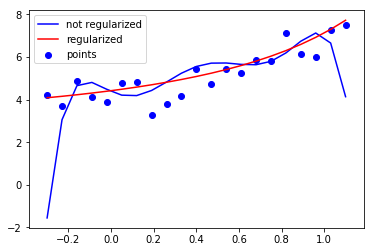

In [204]:
plt.plot(X_test, [polynom_in_point(x, new_coeffs) for x in X_test], label = 'not regularized', color = 'blue')
plt.scatter(X_test, Y_test, label = 'points', color = 'blue')
plt.plot(X_test, [reg_polynom_in_point(x, coeffs) for x in X_test], label = 'regularized', color = 'red')
plt.legend()

*На мой взгляд, график модели с регуляризацией выгодно отличается от модели без регуляризации тем, что он имеет меньше искривлений. Также, возможно, при добавлении новых точек в подборку, график с регуляризацией останется примерно таким же, а график без регуляризации изменится, так как он во многом отражает зависимость именно обучающих данных.*

Попробуйте доказать, что вектор $a = (X^TX + \lambda E)^{-1}X^Ty$ является решением задачи

$$|Xa - y|^2 + \lambda|a|^2\rightarrow\min$$

Интуитивно это можно понимать так: мы ищем компромисс между минимизацией длины разности $|Xa - y|$ (то есть точностью решения задачи регрессии) и тем, чтобы компоненты вектора $a$ не становились слишком большими по модулю.

---

**Ваше решение напишите прямо здесь**

### Задание 4. Онлайн-обучение линейной регрессии (3 балла)

Раньше мы работали в ситуации, когда объекты $x_i$ и значения $y_i$ даны с самого начала и всегда доступны. Допустим теперь, что пары $(x_i, y_i)$ поступают к нам по одной, и мы не можем себе позволить хранить их все в памяти (это может быть актуально, например, если вы пытаетесь обучить модель на устройстве со сравнительно небольшим количеством оперативной памяти: скажем, на мобильном телефоне или на бортовом компьютере спутника связи). В этом случае нам нужно уметь решать следующую задачу:

**Известно:** решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$;

**На вход поступает:** новая пара $(x_{t+1}, y_{t+1})$;

**Требуется:** быстро (за время, не зависящее от $t$) отыскать решение задачи регрессии для расширенного датасета $(x_1, y_1),\ldots,(x_t,y_t),(x_{t+1}, y_{t+1})$.

Эту задачу мы будем решать в два этапа.

**Этап 1.** Обозначим $X_{(t)} = (x_1\ldots x_t)$ и $y_{(t)} = (y_1,\ldots,y_t)^T$. Тогда, как мы хорошо помним, решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$ имеет вид $\hat{a}_{(t)} = \left(X^T_{(t)}X_{(t)}\right)^{-1}X^T_{(t)}y_{(t)}$. Размеры матриц $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$ не зависят от $t$, поэтому их мы, пожалуй, можем себе позволить хранить в памяти.

И вот ваше первое задание в этом разделе: придумайте алгоритм, принимающий на вход матрицы $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$, а также пару $(x_{t+1}, y_{t+1})$ и вычисляющий матрицы $X^T_{(t+1)}X_{(t+1)}$ и $X^T_{(t+1)}y_{(t+1)}$. Сложность вашего алгоритма не должна зависеть от $t$!

--
            
Знаем, что ${ X_{(t)} = 
\begin{pmatrix}
x_{11} & x_{12} & \dots & x_{1n}\\
x_{21} & x_{22} & \dots & x_{2n}\\
\dots & \dots & \dots & \dots \\
x_{t1} & x_{t2} & \dots & x_{tn}
\end{pmatrix}
}$

Тогда ${\; X^{T}_{(t)} = 
\begin{pmatrix}
x_{11} & x_{21} & \dots & x_{t1}\\
x_{12} & x_{22} & \dots & x_{t2}\\
\dots & \dots & \dots & \dots \\
x_{1n} & x_{2n} & \dots & x_{tn}
\end{pmatrix}}$
, где ${n}$ = размер ${x_{i}}$.                             
Размер ${X_{(t)} = {t * n}}$, ${X_{(t)}^{T} = {n * t}}$.

${X^{T}_{(t)} * X_{(t)} =
\begin{pmatrix}
\sum_{i = 1}^{t}{x_{i1} * x_{i1}} & \sum_{i = 1}^{t}{x_{i1} * x_{i2}} & \dots & \sum_{i = 1}^{t}{x_{i1} * x_{in}} \\
\dots & \dots & \dots & \dots \\
\sum_{i = 1}^{t}{x_{in} * x_{i1}} & \sum_{i = 1}^{t}{x_{in} * x_{i2}} & \dots & \sum_{i = 1}^{t}{x_{in} * x_{in}}
\end{pmatrix}\\}$

Теперь, если к нам поступает ${(x_{(t+1)}, y_{(t+1)})}$, тогда в матрицу ${X}$ ${x_{(t+1)}}$ добавится как строка, соотвественно в ${X^{T}}$ как столбец. 
Тогда для того, чтобы не пересчитывать матрицу, мы можем пройти по всей матрице ${X_{(t)}^{T} * X_{(t)}}$ и добавлять к каждому элементу матрицы ${x_{(t + 1)(i)} * x_{(t + 1)(j)}}$, где ${i}$ - номер строки рассматриваемого элемента, ${j}$ - номер столбца.   
Такой проход выполнится за ${n^2}$. Очевидно, что данный алгоритм не зависит от ${t}$.    

Теперь рассмотрим ${X^{T}_{(t)} * y}$:  
${\; X^{T}_{(t)} = 
\begin{pmatrix}
x_{11} & x_{21} & \dots & x_{t1}\\
x_{12} & x_{22} & \dots & x_{t2}\\
\dots & \dots & \dots & \dots \\
x_{1n} & x_{2n} & \dots & x_{tn}
\end{pmatrix} \; \;}$
${y = 
\begin{pmatrix}
y_{1} \\
y_{2} \\
\dots \\
\dots \\
\dots \\
y_{t}
\end{pmatrix}}$        
Размер ${X^{T}}$ = ${n * t}$, ${y}$ = ${t * 1}$     
${X^{T} * y = 
\begin{pmatrix}
\sum_{i = 1}^{t}{x_{i1} * y_{i}} \\
\sum_{i = 1}^{t}{x_{i2} * y_{i}} \\
\dots \\
\dots \\
\dots \\
\sum_{i = 1}^{t}{x_{in} * y_{i}}
\end{pmatrix}}$            
Теперь, если к нам поступает ${(x_{(t+1)}, y_{(t+1)})}$ тогда в матрицу ${X^{T}}$ ${x_{(t+1)}}$ добавится как столбец,
${y_{(t+1)}}$ добавится в матрицу ${y}$ как строка.    
Для того, чтобы не пересчитывать матрицу, мы можем пройтись по всей матрице ${X^{T} * y}$ и добавлять к каждому элементу матрицы
${x_{(t + 1){i}} * y_{(t + 1)}}$,     
где ${i}$ - номер строки рассматриваемого элемента.       
Данный алгоритм выполняется за ${n}$, очевидно, что он не зависит от ${t}$.


Получаем, что общий алгоритм выполняется за ${n^2 + n}$, где ${n}$ - размер ${x_{i}}$.         

*Примечание*: Возможно, алгоритм можно счесть не до конца доказанным, но, как мне кажется, он вытекает из правила умножения матриц.

**Этап 2.** Теперь настало время написать немного кода и порисовать красивые картинки. Вам нужно будет реализовать симуляцию онлайн-обучения регрессии для задачи приближения функции (в данном случае $f_{true}(x) = 2x\sin(x) + x^2 - 1$; все значения искажены небольшим нормальным шумом) многочленом степени не выше 5.

In [ ]:
from IPython.display import clear_output

f_true = lambda x: 2*x*np.sin(5*x) + x**2 - 1 # this is the true function

# We need this to make the plot of f_true:
x_grid = np.linspace(-2,5,100) # 100 linearly spaced numbers
x_grid_enl = np.hstack((x_grid.reshape((100,1))**j for j in range(6)))
y_grid = f_true(x_grid)


for i in range(200):

    x_new = np.random.uniform(-2, 5)
    y_new = f_true(x_new) + 2*np.random.randn()
    
    # your code goes here
    
    # the rest of code is just bells and whistles
    if (i+1)%5==0:
        clear_output(True)
        plt.plot(x_grid,y_grid, color='blue', label='true f')
        plt.scatter(x_new, y_new, color='red')
        
        # your code goes here
        y_pred = #...
        
        plt.scatter(x_grid, y_pred, color='orange', linewidth=5, label='predicted f')
        
        plt.legend(loc='upper left')
        plt.show()

### Добавление. QR-разложение

**QR-разложением** матрицы $A$ (не обязательно квадратной) мы будем называть её представление в виде $A = QR$, где $Q$ - матрица с ортонормированными столбцами, а $R$ - верхнетреугольная матрица.

Смысл QR-разложения следующий. Пусть $a_1,\ldots,a_m$ - столбцы матрицы $A$, $q_1,\ldots,q_t$ - столбцы матрицы $Q$. Тогда $q_1,\ldots,q_t$ - это ортонормированный базис в подпространстве, являющемся линейной оболочкой векторов $a_1,\ldots,a_m$, а в матрице $R$ записаны коэффициенты, с помощью которых $a_i$ выражаются через $q_1,\ldots,q_t$.

Находить QR-разложение заданной матрицы можно разными способами. Мы познакомим вас не с самым лучшим из них, но по крайней мере с наиболее простым концептуально. Заметим, что ортогональный базис линейной оболочки можно найти с помощью ортогонализации Грама-Шмидта. При этом коэффициенты из матрицы $R$ получаются в качестве побочного продукта этого процесса:

```python
for j = 1...n:
    q_j = a_j
    for i = 1,...,j-1:
        r_ij = (q_i, a_j)
        q_j = q_j - r_ij * q_i
    r_jj = |q_j|
    if r_jj == 0: # a_j in <a_1,...,a_j-1>
        # What would you do in this case?..
    q_j = q_j / r_jj
```

Для нахождения QR-разложения вы можете использовать библиотечную функцию `scipy.linalg.qr`.

Поскольку лабораторная про линейную регрессию, не так-то просто замять вопрос о том, какое же отношение QR-разложение имеет к задаче регрессии. Упомянем одно из возможных применений.

Допустим, мы нашли QR-разложение матрицы $X$, а именно: $X = QR$. Тогда
$$X^TX = (QR)^T(QR) = R^TQ^TQR = R^TR$$

Поскольку в задаче регрессии матрица $X$ обычного полного ранга (то есть её столбцы линейно независимы), матрица $R$ будет квадратной. Благодаря этому нашу обычную формулу для набора регрессионных коэффициентов $\hat{a}$ можно переписать в следующем виде:

$$\hat{a} = (X^TX)^{-1}X^Ty = (R^TR)^{-1}(QR)^Ty = R^{-1}(R^T)^{-1}R^TQ^Ty = R^{-1}Q^Ty$$

Как видите, формула стала проще. Более того, зачастую обращение матрицы $R$ может быть численно более устойчиво, чем обращение матрицы $X^TX$.